# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [3]:
# Import your libraries:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [ ]:
# loading the data:

customers = pd.read_csv('../data/Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [6]:
# Your code here:

customers.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [7]:
customers.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

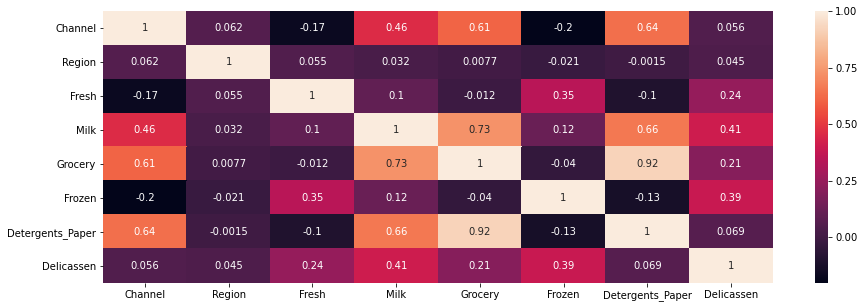

In [8]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(customers.corr(), annot=True);

In [9]:
customers.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [10]:
customers.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [11]:
customers.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [12]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Plot a histogram for all remaining variables in `customers`.

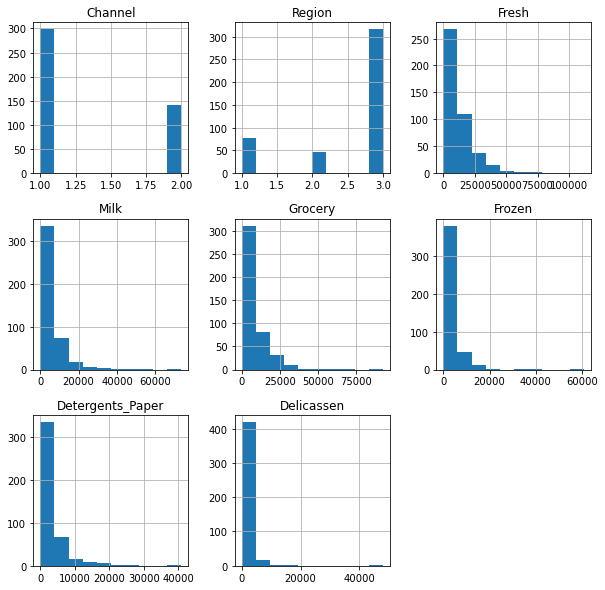

In [13]:
customers.hist(figsize=(10,10));

In [14]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#### Our data shows fresh produce expense ranging from 3 to over 112k. While this is a big range, it is not an unreasonable range. In other words, we do not have customers spending over a million dollars in one category. So we will opt not to drop any outliers.

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [15]:
# Your code here

customers.drop(columns=['Channel', 'Region'], inplace=True)

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [16]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

stscaler = StandardScaler().fit(customers)
customers_scale = stscaler.transform(customers)

In [18]:
customers_scale

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` because they have the same length and order of rows. Then you'll see the cluster results of the original data.

In [19]:
# Your code here:
from sklearn.cluster import KMeans
kmeans = KMeans()
customers_kmeans = kmeans.fit(customers)
customers['labels'] = customers_kmeans.labels_

customers.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,12669,9656,7561,214,2674,1338,6
1,7057,9810,9568,1762,3293,1776,6
2,6353,8808,7684,2405,3516,7844,6
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,1
5,9413,8259,5126,666,1795,1451,0
6,12126,3199,6975,480,3140,545,0
7,7579,4956,9426,1669,3321,2566,6
8,5963,3648,6192,425,1716,750,0
9,6006,11093,18881,1159,7425,2098,6


Count the values in `labels`.

In [20]:
# Your code here:
    
customers.labels.value_counts()

0    186
1    102
6     92
3     30
4     22
2      5
5      2
7      1
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one with K-Means and the other with DBSCAN.

In [21]:
# Your code here
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5)
customers_dbscan = dbscan.fit(customers_scale)
customers['labels_DBSCAN'] = customers_dbscan.labels_

customers.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,12669,9656,7561,214,2674,1338,6,0
1,7057,9810,9568,1762,3293,1776,6,0
2,6353,8808,7684,2405,3516,7844,6,-1
3,13265,1196,4221,6404,507,1788,0,0
4,22615,5410,7198,3915,1777,5185,1,-1


Count the values in `labels_DBSCAN`.

In [22]:
# Your code here
customers.labels_DBSCAN.value_counts()

 0    261
-1    174
 1      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

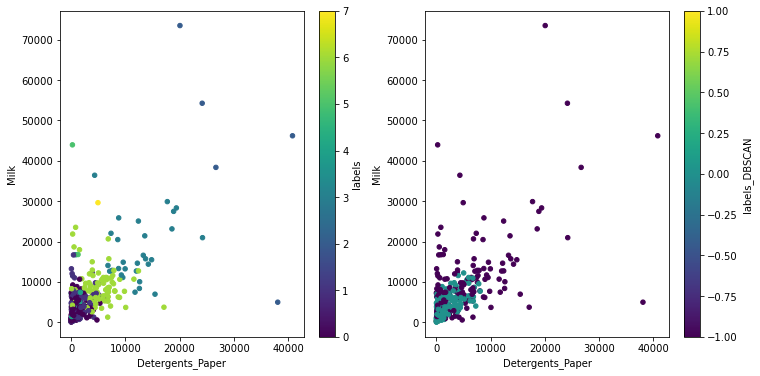

In [25]:
# Your code here:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))

customers.plot.scatter(x="Detergents_Paper", 
                       y="Milk", 
                       c="labels", 
                       colormap="viridis",
                       ax=axes[0])

customers.plot.scatter(x="Detergents_Paper", 
                       y="Milk", 
                       c="labels_DBSCAN", 
                       colormap="viridis",
                       ax=axes[1])

Plot `Grocery` vs. `Fresh` using the labels to color the scatter plot. Interpret the graph in the comments of the cell below.

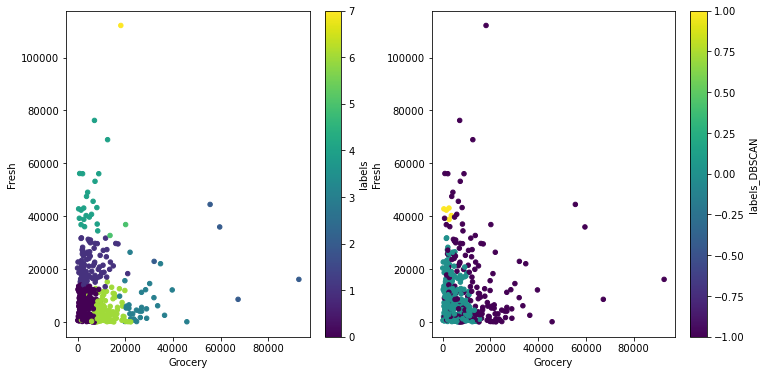

In [26]:
# Your code here:

# Your code here:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))

customers.plot.scatter(x="Grocery", 
                       y="Fresh", 
                       c="labels", 
                       colormap="viridis",
                       ax=axes[0])

customers.plot.scatter(x="Grocery", 
                       y="Fresh", 
                       c="labels_DBSCAN", 
                       colormap="viridis",
                       ax=axes[1])


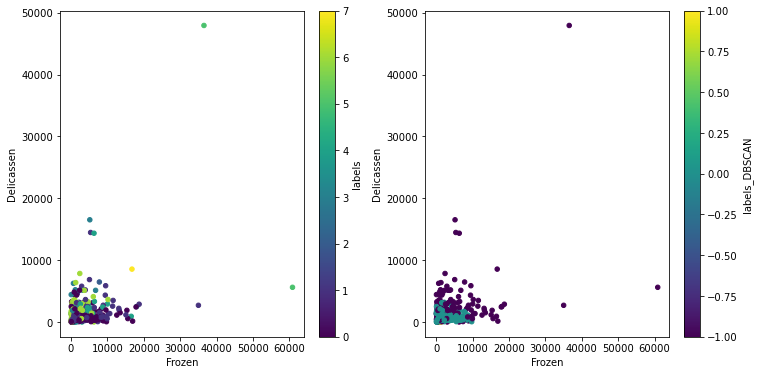

In [27]:
# Your code here:

# Your code here:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))

customers.plot.scatter(x="Frozen", 
                       y="Delicassen", 
                       c="labels", 
                       colormap="viridis",
                       ax=axes[0])

customers.plot.scatter(x="Frozen", 
                       y="Delicassen", 
                       c="labels_DBSCAN", 
                       colormap="viridis",
                       ax=axes[1])


Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [28]:
# Your code here:

customers.groupby("labels").mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,
0,6397.618280,2478.177419,3057.397849,2666.069892,739.446237,881.215054,-0.139785
1,21130.745098,3870.215686,5206.696078,4166.852941,1137.794118,1690.284314,-0.421569
2,25603.000000,43460.600000,61472.200000,2636.000000,29974.200000,2708.800000,-1.000000
3,6683.066667,17468.033333,26658.933333,1986.300000,11872.900000,2531.200000,-1.000000
4,46518.000000,3438.681818,4785.090909,5249.954545,801.045455,2147.227273,-0.545455
5,34782.000000,30367.000000,16898.000000,48701.500000,755.500000,26776.000000,-1.000000
6,4361.086957,8557.586957,12331.065217,1394.847826,5262.228261,1476.163043,-0.543478
7,112151.000000,29627.000000,18148.000000,16745.000000,4948.000000,8550.000000,-1.000000


In [29]:
customers.groupby("labels_DBSCAN").mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,
-1,15608.988506,10000.408046,13693.298851,4786.275862,5291.373563,2510.781609,3.034483
0,9030.398467,3077.318008,4234.061303,1963.432950,1322.134100,881.773946,1.191571
1,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,4.000000


# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?



 Number of clusters: 2 




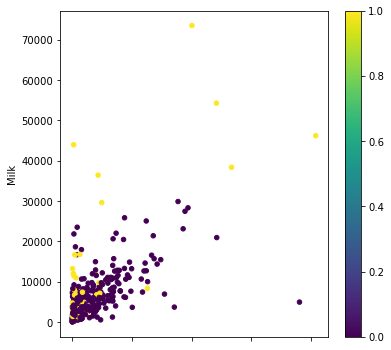



 Number of clusters: 3 




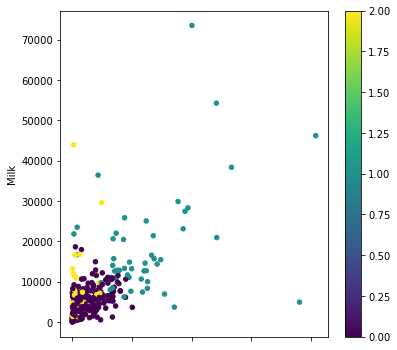



 Number of clusters: 4 




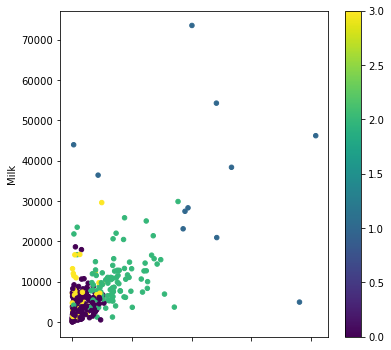



 Number of clusters: 5 




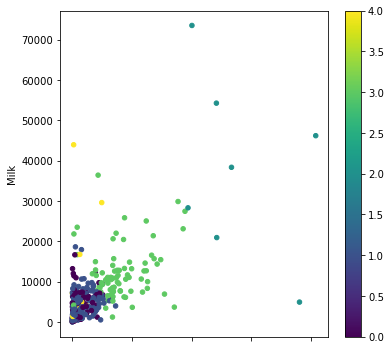



 Number of clusters: 6 




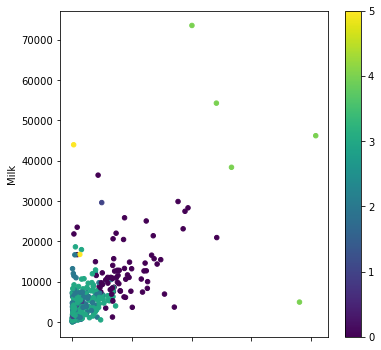



 Number of clusters: 7 




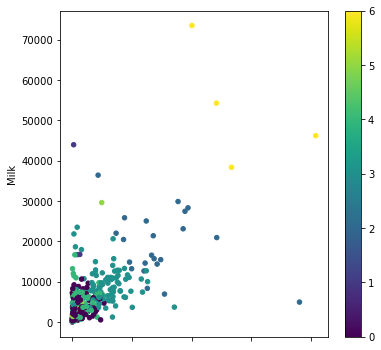



 Number of clusters: 8 




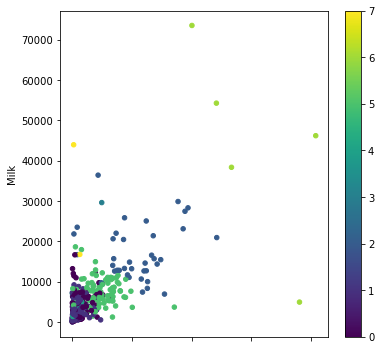

In [30]:
# Your code here
# example if columns 'Detergents_Paper' and 'Milk'

from sklearn.cluster import KMeans

for i in range(2, 9):
    
    print('\n\n Number of clusters:', i, '\n\n')
    
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(customers)
    customers.plot.scatter(subplots=True, 
                           figsize=(6, 6), 
                           x="Detergents_Paper", 
                           y="Milk", 
                           c=kmeans.labels_, 
                           colormap="viridis")
    plt.show()

# Challenge 3 - Changing DBSCAN eps and min_samples
Experiment changing the eps and min_samples params for DBSCAN. See how the results differ with  scatter plot visualization.

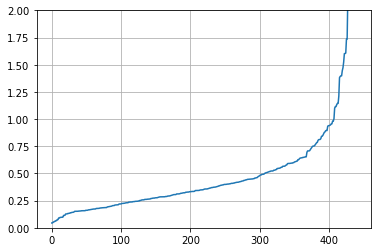

In [40]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(customers_scale)
distances, indices = nbrs.kneighbors(customers_scale)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.ylim(top=2,bottom=0.0)
plt.grid(True)

#plt.xlabel()


#Here we will try to find the elbow for our eps. The optimal value for epsilon will be found at the point of maximum curvature.
# u can learn more about it in this article https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

In [41]:
dbscan = DBSCAN(eps=0.6, min_samples =3)
customers_dbscan = dbscan.fit(customers_scale)
customers['labels_DBSCAN_changed'] = customers_dbscan.labels_
# Now that we have the best value for the eps we can play arround with the min_samples parameters, 
# it will determine the amount of clusters we have in the end, the higher the value less clusters we will have


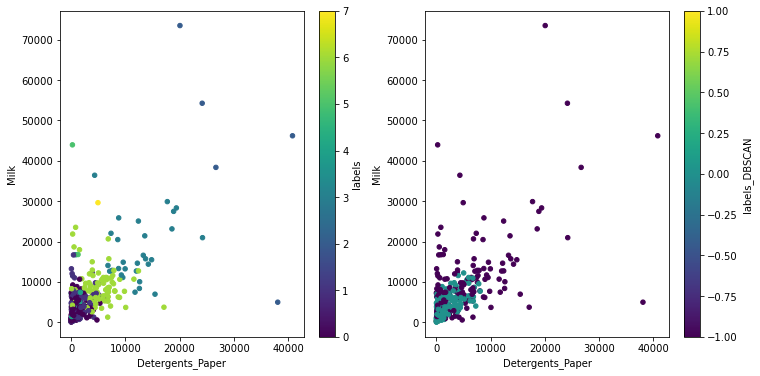

In [42]:
# Your code here:

# Your code here:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))

customers.plot.scatter(x="Detergents_Paper", 
                       y="Milk", 
                       c="labels", 
                       colormap="viridis",
                       ax=axes[0])

customers.plot.scatter(x="Detergents_Paper", 
                       y="Milk", 
                       c="labels_DBSCAN", 
                       colormap="viridis",
                       ax=axes[1])